In [1]:
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence

import pandas as pd
import numpy as np
import random

from RoadDataset import RoadDataset
from MultiRoadDataset import MultiRoadDataset

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_datasets_path = "../notebooks/datasets/train/"
sub_dirs = os.listdir(train_datasets_path)
train_dataset_paths = [[train_datasets_path + sub_dir + "/" + sub_dir + ".csv", train_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
train_dataset_paths

[['../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/frames/'],
 ['../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv',
  '../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv',
  '../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/frames/'],
 ['../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv',
  '../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/frames/'],
 ['../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv',
  '../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/frames/'],
 ['../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 

In [4]:
val_datasets_path = "../notebooks/datasets/validation/"
sub_dirs = os.listdir(val_datasets_path)
val_dataset_paths = [[val_datasets_path + sub_dir + "/" + sub_dir + ".csv", val_datasets_path + sub_dir + "/frames/"] for sub_dir in sub_dirs]
val_dataset_paths

[['../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/Tag-Sonne-Wolken-Ausserorts.csv',
  '../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/frames/'],
 ['../notebooks/datasets/validation/Nacht-Schneechaos/Nacht-Schneechaos.csv',
  '../notebooks/datasets/validation/Nacht-Schneechaos/frames/']]

In [5]:
column_names = ['filename','steering_wheel_angle','speed', 'blink_l', 'blink_r']
my_batch_size = 16

In [6]:
multi_train_dataset = MultiRoadDataset(column_names, batch_size=my_batch_size)

for train_dataset_path in train_dataset_paths:
    multi_train_dataset.addRoadDataset(train_dataset_path[0], train_dataset_path[1])
    

Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_09_33 2020/Sun Dec 27 18_09_33 2020.csv
Loaded dataset with 8096 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 17_46_56 2020/Sun Dec 27 17_46_56 2020.csv
Loaded dataset with 3775 samples
Reading csv file: ../notebooks/datasets/train/Sun Feb 21 21:50:50 2021/Sun Feb 21 21:50:50 2021.csv
Failed to read csv file!
Loaded dataset with 0 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_01_53 2020/Sun Dec 27 18_01_53 2020.csv
Loaded dataset with 7060 samples
Reading csv file: ../notebooks/datasets/train/Wed Dec 30 17_34_37 2020/Wed Dec 30 17_34_37 2020.csv
Loaded dataset with 3112 samples
Reading csv file: ../notebooks/datasets/train/Sun Jan 10 11:31:18 2021/Sun Jan 10 11:31:18 2021.csv
Loaded dataset with 17985 samples
Reading csv file: ../notebooks/datasets/train/Sun Dec 27 18_25_24 2020/Sun Dec 27 18_25_24 2020.csv
Loaded dataset with 2793 samples
Reading csv file: ../notebooks/datasets/train/

In [7]:
len(multi_train_dataset)

33574

In [8]:
multi_train_dataset.clean()

Cleaning dataset. Starting with 8096 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 389 rows for reason: High SWA (> +180/ < -180 deg)
Removing 1666 rows for reason: Low speed (< 25 km/h)
Removing 141 rows for reason: Left blinker on
Removing 42 rows for reason: Right blinker on
5855 samples remaining.
Cleaning dataset. Starting with 3775 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 425 rows for reason: High SWA (> +180/ < -180 deg)
Removing 862 rows for reason: Low speed (< 25 km/h)
Removing 90 rows for reason: Left blinker on
Removing 221 rows for reason: Right blinker on
2174 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame after cam latency compensation
Removing 0 rows for reason: High SWA (> +180/ < -180 deg)
Removing 0 rows for reason: L

Removing 166 rows for reason: Low speed (< 25 km/h)
Removing 0 rows for reason: Left blinker on
Removing 0 rows for reason: Right blinker on
0 samples remaining.
Cleaning dataset. Starting with 5705 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 327 rows for reason: High SWA (> +180/ < -180 deg)
Removing 765 rows for reason: Low speed (< 25 km/h)


/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")
/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")


Removing 48 rows for reason: Left blinker on
Removing 142 rows for reason: Right blinker on
4420 samples remaining.
Cleaning dataset. Starting with 7744 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 246 rows for reason: High SWA (> +180/ < -180 deg)
Removing 1594 rows for reason: Low speed (< 25 km/h)
Removing 38 rows for reason: Left blinker on
Removing 75 rows for reason: Right blinker on
5788 samples remaining.
Cleaning dataset. Starting with 15174 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 361 rows for reason: High SWA (> +180/ < -180 deg)
Removing 540 rows for reason: Low speed (< 25 km/h)
Removing 105 rows for reason: Left blinker on
Removing 644 rows for reason: Right blinker on
13521 samples remaining.
Cleaning dataset. Starting with 0 samples.
Removing 0 rows for reason: SWA is NaN
Removing 0 rows for reason: No frame 

/tf/notebooks/Autopilot/diypilot/notebooks/RoadDataset.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv['filename'] = csv['filename'].shift(self.latency_compensation_frames, fill_value = "No frame")


Removing 11 rows for reason: Left blinker on
Removing 35 rows for reason: Right blinker on
4395 samples remaining.
Cleaning dataset. Starting with 10289 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 392 rows for reason: High SWA (> +180/ < -180 deg)
Removing 2243 rows for reason: Low speed (< 25 km/h)
Removing 17 rows for reason: Left blinker on
Removing 124 rows for reason: Right blinker on
7510 samples remaining.
Cleaning dataset. Starting with 38239 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 689 rows for reason: High SWA (> +180/ < -180 deg)
Removing 2918 rows for reason: Low speed (< 25 km/h)
Removing 302 rows for reason: Left blinker on
Removing 552 rows for reason: Right blinker on
33775 samples remaining.
Cleaning dataset. Starting with 8994 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No f

In [9]:
stats = multi_train_dataset.get_csv().describe()
stats = stats.transpose()
print(stats)

                         count       mean        std      min     25%     50%  \
steering_wheel_angle  447939.0  -1.123429  18.070421 -179.310  -4.450  -0.630   
speed                 447939.0  71.365565  31.197547   25.017  48.701  64.387   
blink_l               447938.0   0.000000   0.000000    0.000   0.000   0.000   
blink_r               447938.0   0.000000   0.000000    0.000   0.000   0.000   

                         75%      max  
steering_wheel_angle   2.380  179.620  
speed                 84.971  205.158  
blink_l                0.000    0.000  
blink_r                0.000    0.000  


In [10]:
multi_train_dataset.balance()

Balancing dataset (step 1). Starting with 5855 samples (Std. dev: 16.842018286135705)
1360 samples remaining after Balancing step 1 (Std. dev: 31.062020648093597)
Balancing dataset (step 2). Starting with 1360 samples
Mean: -0.8017426470588231)
1152 samples remaining after Balancing step 2
Mean: 0.19722222222222247)

Balancing dataset (step 1). Starting with 2174 samples (Std. dev: 24.36466022008058)
648 samples remaining after Balancing step 1 (Std. dev: 37.77581121204924)
Balancing dataset (step 2). Starting with 648 samples
Mean: -4.921496913580248)
552 samples remaining after Balancing step 2
Mean: 0.0801449275362321)

Balancing dataset (step 1). Starting with 5734 samples (Std. dev: 22.4455903600459)
1466 samples remaining after Balancing step 1 (Std. dev: 41.44392360868294)
Balancing dataset (step 2). Starting with 1466 samples
Mean: 0.6091678035470662)
1290 samples remaining after Balancing step 2
Mean: 0.07584496124031001)

Balancing dataset (step 1). Starting with 226 samples 

1512 samples remaining after Balancing step 1 (Std. dev: 29.34255116849079)
Balancing dataset (step 2). Starting with 1512 samples
Mean: -0.055562169312168855)
1312 samples remaining after Balancing step 2
Mean: 0.17382621951219543)

Balancing dataset (step 1). Starting with 33775 samples (Std. dev: 14.979088526273314)
6351 samples remaining after Balancing step 1 (Std. dev: 32.9427935500073)
Balancing dataset (step 2). Starting with 6351 samples
Mean: -0.8342213824594551)
5764 samples remaining after Balancing step 2
Mean: -0.044432685634975336)

Balancing dataset (step 1). Starting with 1568 samples (Std. dev: 23.594021327080537)
323 samples remaining after Balancing step 1 (Std. dev: 45.59158757097622)
Balancing dataset (step 2). Starting with 323 samples
Mean: 15.236346749226007)
250 samples remaining after Balancing step 2
Mean: 0.3654800000000009)

Balancing dataset (step 1). Starting with 19560 samples (Std. dev: 23.446296491322077)
4327 samples remaining after Balancing step 1 

In [11]:
stats = multi_train_dataset.get_csv().describe()
stats = stats.transpose()
print(stats)

                        count       mean        std      min    25%     50%  \
steering_wheel_angle  79156.0   0.012005  30.708429 -179.310 -16.59  -0.030   
speed                 79156.0  57.419177  23.148499   25.017  42.16  53.072   
blink_l               79156.0   0.000000   0.000000    0.000   0.00   0.000   
blink_r               79156.0   0.000000   0.000000    0.000   0.00   0.000   

                         75%     max  
steering_wheel_angle  16.590  179.62  
speed                 67.053  204.91  
blink_l                0.000    0.00  
blink_r                0.000    0.00  


In [12]:
len(multi_train_dataset)

4947

In [13]:
val_datasets = []
for val_dataset_path in val_dataset_paths:
    val_dataset = RoadDataset(val_dataset_path[0], val_dataset_path[1], column_names, batch_size=my_batch_size)
    val_dataset.set_lateral_shift_range(0)
    val_dataset.clean()
    print()
    if len(val_dataset) > 0:
        val_datasets.append(val_dataset)
        

Reading csv file: ../notebooks/datasets/validation/Tag-Sonne-Wolken-Ausserorts/Tag-Sonne-Wolken-Ausserorts.csv
Loaded dataset with 10474 samples
Cleaning dataset. Starting with 10474 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 290 rows for reason: High SWA (> +180/ < -180 deg)
Removing 915 rows for reason: Low speed (< 25 km/h)
Removing 66 rows for reason: Left blinker on
Removing 363 rows for reason: Right blinker on
8837 samples remaining.

Reading csv file: ../notebooks/datasets/validation/Nacht-Schneechaos/Nacht-Schneechaos.csv
Loaded dataset with 7527 samples
Cleaning dataset. Starting with 7527 samples.
Removing 0 rows for reason: SWA is NaN
Removing 3 rows for reason: No frame after cam latency compensation
Removing 486 rows for reason: High SWA (> +180/ < -180 deg)
Removing 1480 rows for reason: Low speed (< 25 km/h)
Removing 19 rows for reason: Left blinker on
Removing 45 rows for reason: Right bl

In [14]:
len(val_datasets)

2

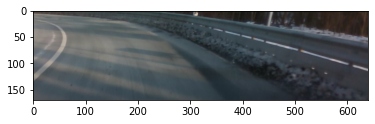

Vel: 46.5 km/h, SWA: 64.20131251597675 deg


In [15]:
import matplotlib.pyplot as plt
batch = multi_train_dataset[0]
samples = batch[0]
labels = batch[1]

images = samples[0]
velocities = samples[1]



image = images[0]
vel = velocities[0]
swa = labels[0]
swa = multi_train_dataset.denormalize_swa(swa)
plt.figure()
plt.imshow(image)
plt.grid(False)
plt.show()
print("Vel: {} km/h, SWA: {} deg".format(vel*250, swa))

In [16]:
from tensorflow.keras import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import concatenate, ELU, Conv2D, MaxPooling2D, Dense, Flatten, Lambda, Dropout, BatchNormalization

ch, row, col = 3, 170, 640

frame_input = Input(shape=(row, col, ch), name='frame_in')
velocity_input = Input(shape=(1,), name='velocity_in')

# Image branch
x = Lambda(lambda x: x/127.5 - 1., input_shape=(row, col, ch), output_shape=(row, col, ch), name='frame_normalize')(frame_input)
x = MaxPooling2D(pool_size=(2,3), strides=(2,3), padding='valid', name='frame_downsample')(x)
    
x = Conv2D(filters=24, kernel_size=(5,5), strides=(3,3), activation='elu')(x)
#x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)
    
x = Conv2D(filters=36, kernel_size=(5,5), strides=(3, 3), activation='elu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)
    
#x = Conv2D(filters=48, kernel_size=(5,5), strides=(2, 2), activation='elu')(x)

#x = Conv2D(filters=64, kernel_size=(3,3), strides=(2, 1), activation='elu')(x)

x = Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), activation='elu')(x)
x = MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid')(x)

x = Flatten()(x)

x = Dense(50, activation='elu')(x)

x = Model(inputs=frame_input, outputs = x)

# Velocity branch
y = Dense(1, activation='linear')(velocity_input)
y = Model(inputs=velocity_input, outputs = y)


# Combine
combined = concatenate([x.output, y.output])

#combined = Dense(100, activation='elu')(combined)

#combined = Dense(50, activation='elu')(combined)

combined = Dense(10, activation='elu')(combined)

combined = Dense(1, activation='linear', name='swa_out')(combined)

model = Model(inputs=[x.input, y.input], outputs=combined)



model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [17]:
model_name = 'v17.6_symmetric_balancing_no_flip'
try:
    model = keras.models.load_model('./trained_models/' + model_name + '.h5')
except:
    print("Model not found. Training from scratch")

Model not found. Training from scratch


In [18]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
frame_in (InputLayer)           [(None, 170, 640, 3) 0                                            
__________________________________________________________________________________________________
frame_normalize (Lambda)        (None, 170, 640, 3)  0           frame_in[0][0]                   
__________________________________________________________________________________________________
frame_downsample (MaxPooling2D) (None, 85, 213, 3)   0           frame_normalize[0][0]            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 27, 70, 24)   1824        frame_downsample[0][0]           
____________________________________________________________________________________________

In [19]:
import numpy as np
import matplotlib.pylab as plt


def get_smoothness_score(series):
    
    def running_mean(x, N):
        cumsum = np.cumsum(np.insert(x, 0, 0)) 
        return (cumsum[N:] - cumsum[:-N]) / float(N)

    smooth = running_mean(series, 9)
    diff = series[4:-4] - smooth
    
    smoothness = 1/np.mean(np.abs(diff))
    print(smoothness)
    return smoothness

In [20]:
from tensorflow.keras.preprocessing.image import img_to_array
def dataset_thumbs(dataset):
    
    thumbs = 7
    frames = dataset.get_batch_size()*len(dataset)-1
    
    print("Dataset contains {} frames".format(frames))

    plt.figure(figsize=(15,25))
    for i in range(thumbs):
        
        # original frame
        framenr = frames//thumbs*i
        #print("Getting frame {}".format(framenr))
        sample = dataset.get_sample(framenr)
        frame = sample['frame']
        frame = frame/255
        
        plt.subplot(thumbs,3,i*3+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(frame)
        
        # augmented frame
        sample = dataset.get_sample(framenr, augment=True)
        aug_frame = sample['frame']
        aug_frame = aug_frame/255
        
        plt.subplot(thumbs,3,i*3+2)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(aug_frame)
        
        # cropped frame
        sample = dataset.get_sample(framenr, crop=True)
        cropped_frame = sample['frame']
        cropped_frame = cropped_frame/255
        
        plt.subplot(thumbs,3,i*3+3)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(cropped_frame)
        
        
        
        
        #plt.xlabel(class_names[train_labels[i]])
    plt.show()

Predictions: [[-0.26413292]]
Ground-truth (deg): 21.47
Prediction (denormed swa (deg)): -3.752754872125406
Predictions: [[-0.23132725]]
Ground-truth (deg): -7.2
Prediction (denormed swa (deg)): -3.0452952882224107
Predictions: [[-0.23986979]]
Ground-truth (deg): 46.46
Prediction (denormed swa (deg)): -3.220673067498139
Predictions: [[-0.19385228]]
Ground-truth (deg): 17.41
Prediction (denormed swa (deg)): -2.3429606067675923
Predictions: [[-0.27781132]]
Ground-truth (deg): -13.27
Prediction (denormed swa (deg)): -4.076278714761546
Starting Epoch 1 for all datasets
Dataset contains 79151 frames


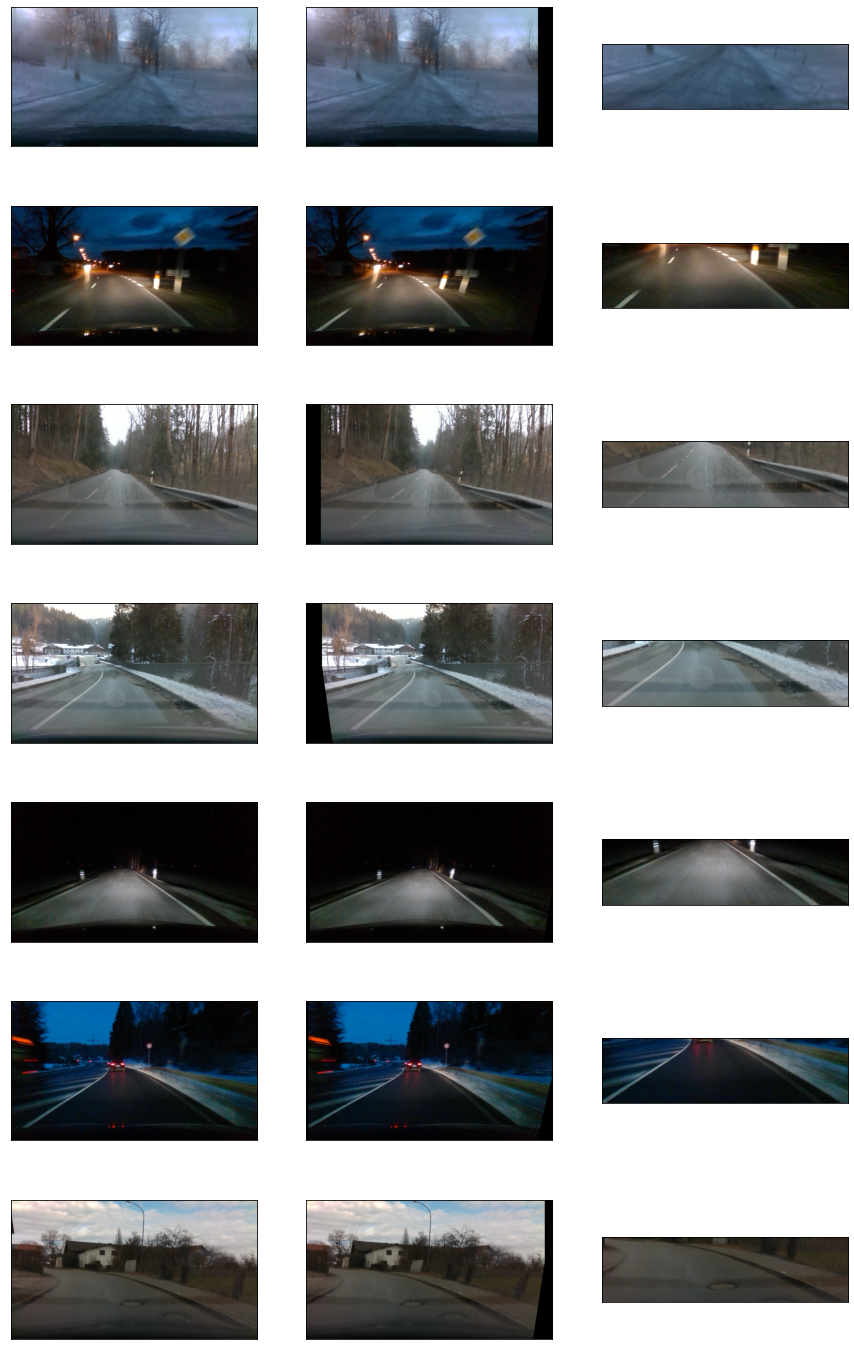

Dataset Mean Absolute Normalized SWA: 0.5135275953414047
4947/4947 [==============================] - 447s 90ms/step - loss: 0.0784 - mse: 0.0784 - mae: 0.1997
Model quality: 61.1%



Predictions: [[-0.8468609]]
Ground-truth (deg): 1.63
Prediction (denormed swa (deg)): -57.18041876320658
Predictions: [[0.58568627]]
Ground-truth (deg): 75.07
Prediction (denormed swa (deg)): 18.819545776310104
Predictions: [[0.47846976]]
Ground-truth (deg): 21.22
Prediction (denormed swa (deg)): 11.558670303136067
Predictions: [[0.61252147]]
Ground-truth (deg): 25.42
Prediction (denormed swa (deg)): 21.178683900619678
Predictions: [[-0.7095799]]
Ground-truth (deg): -26.05
Prediction (denormed swa (deg)): -32.174054663327446
Starting Epoch 2 for all datasets
4947/4947 [==============================] - 445s 90ms/step - loss: 0.0480 - mse: 0.0480 - mae: 0.1483
Model quality: 71.1%



Predictions: [[-0.17974451]]
Ground-truth (deg): -15.21
Prediction (denormed swa (deg)): -2.104669499338941
Predictions: [[0

4947/4947 [==============================] - 417s 84ms/step - loss: 0.0307 - mse: 0.0307 - mae: 0.1169
Model quality: 77.2%



Predictions: [[0.5453988]]
Ground-truth (deg): 18.78
Prediction (denormed swa (deg)): 15.72085629422655
Predictions: [[0.13840698]]
Ground-truth (deg): -1.25
Prediction (denormed swa (deg)): 1.479105041710604
Predictions: [[0.4143559]]
Ground-truth (deg): 16.72
Prediction (denormed swa (deg)): 8.491556554614236
Predictions: [[-0.17966843]]
Ground-truth (deg): -3.19
Prediction (denormed swa (deg)): -2.1034204688962763
Predictions: [[0.28331527]]
Ground-truth (deg): 0.63
Prediction (denormed swa (deg)): 4.211536352568061
Starting Epoch 14 for all datasets
4947/4947 [==============================] - 418s 84ms/step - loss: 0.0299 - mse: 0.0299 - mae: 0.1152
Model quality: 77.6%



Predictions: [[-0.63135207]]
Ground-truth (deg): -20.72
Prediction (denormed swa (deg)): -22.991991874540386
Predictions: [[-0.5528237]]
Ground-truth (deg): -12.08
Prediction (denormed s

KeyboardInterrupt: 

In [21]:
epochs = 200

qualities = dict()


for epoch in range(epochs):
    
    # Predict a couple as a sanity check
    for i in range(5):
        sample_idx = random.randint(0, 10000)
        sample = multi_train_dataset.get_sample(sample_idx, augment=False, crop=True, normalize=False)
        cropped_frame = sample['frame']
        actual_swa = sample['swa']
        v_vehicle = sample['v_vehicle']
        blink_l = sample['blink_l']
        blink_r = sample['blink_r']
        timestamp = sample['filename']
        
        #cropped_frame = np.zeros_like(cropped_frame)
        #v_vehicle = 0
        #actual_swa = 0.5

        test_data = [np.array([cropped_frame]), np.array([v_vehicle/250])]
        predictions = model.predict(test_data)

        #predicted_swa = val_set.denormalize_swa(predictions[0][0])
        predicted_swa = predictions[0][0]
        denormed_pred_swa = multi_train_dataset.denormalize_swa(predicted_swa)
        print("Predictions: " + str(predictions))
        print("Ground-truth (deg): " +str(actual_swa))
        print("Prediction (denormed swa (deg)): " + str(denormed_pred_swa))
        print()
        
    print("Starting Epoch {} for all datasets".format(epoch+1))
    qualities["epoch-" + str(epoch)] = dict()
    
    naive_norm_mae = multi_train_dataset.get_mean_absolute_normalized_swa()
    if epoch == 0:
        dataset_thumbs(multi_train_dataset)
        print("Dataset Mean Absolute Normalized SWA: {}".format(naive_norm_mae))
    hist = model.fit(multi_train_dataset, epochs=1, verbose=1, workers=4)#, use_multiprocessing=False, workers=1)
    model.save('./trained_models/' + model_name + "_epoch_" + str(epoch+1) + '.h5')
    
    
    model_mae = hist.history['mae'][-1]

    quality = 1 - (model_mae/naive_norm_mae)
    qualities["epoch-" + str(epoch)] = quality
    print("Model quality: {:.1f}%".format(100*quality))
        
    
        
    print()
    #i = 1
    #for val_set in val_sets:
    #    loss = model.evaluate(val_set, verbose=1)
    #    predictions = model.predict(val_set, verbose=1)
    #    predictions_degrees = [x[0]*90 for x in predictions.tolist()]
    #    get_smoothness_score(predictions_degrees)
    #    #print("Validation Set {} loss: {}".format(i, loss))
    #    i+=1
        
    print()
    print()
    